# **HW5 for Nonlinear Control Systems** 

> Instructor: Dr. Le Yi Wang  
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     
> Date: 11.15.2021

## Descriptions
- Source codes are and will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/NLS-HW.git).  
- *Jupyter Notebook* and *python3* are used in the solutions.

## Solutions   
#### Problem 1 (Exercises 5.1): 
Determine whether the system in Figure exhibits a self-sustained oscilation (a limit cycle). If so, determine the stability, frequency, and amplitude of the oscillation.     

**Solution:**    


According to equation(5.12) in the textbook, the describing function of the relay nonlinearity is     

$$ N(A)=\frac{4M}{\pi A} = \frac{4}{\pi A} $$ 

$$-\frac{1}{N(A)}=-\frac{\pi A}{4}$$

$$G(j\omega)=\frac{K}{j\omega(j\omega +1)(j\omega +2)}=\frac{K}{-3\omega^2+(-\omega^2 +2)j\omega}$$

Draw the figure for $G(j\omega)$ and $-\frac{1}{N(A)}$

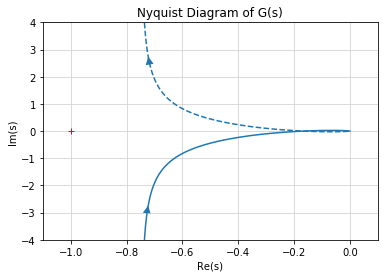

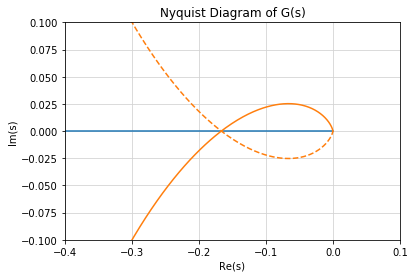

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sympy import *
import control
%matplotlib inline

#Creating a transfer function G
s = control.TransferFunction.s

K0 = 1
# T = 10
G = K0 / (s**3+3*(s**2)+2*s)

control.nyquist(G)

plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-4,4)
plt.xlim(-1.1,.1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = np.linspace(-10,-0,5,endpoint=True)
y1 = 0*x1
ax.plot(x1,y1)
control.nyquist(G)
plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-.1,.1)
plt.xlim(-.4,.1)
plt.show()


Apparently, accourding to the figure, the system has a limit cycle.
The intersect between $G(j\omega)$ and $x$-axis is 
$$ -\omega^2+2 =0  \Rightarrow \omega=\sqrt{2}$$    
When $\omega=\sqrt{2}$, $G(j\omega) = -\frac{K}{6}$
$$ 1+G(j\omega)N(A)=0$$   
$$1+\frac{-K}{6}\frac{4}{\pi A}=0$$   
The amplitude of the oscillation is   
$$A=\frac{2K}{3\pi}$$    
The limit circle is stable. When K is bigger, the trace of $G(j\omega)$ contains more points of $-1/N(A)$ which means the amplitude of the limit cycle is bigger, the system is harder to reach stable.

#### Problem 2 (Exercises 5.2): 
Determine whether the system in Figure5.29 exhibits a self-sustained oscilation (a limit cycle). If so, determine the stability, frequency, and amplitude of the oscillation.     

**Solution:**    


According to equation(5.13) in the textbook, the describing function of the deadzone nonlinearity is     

$$ N(A)=\frac{2K}{\pi}(\frac{\pi}{2}-\sin^{-1}{\frac{a}{4}}-\frac{a}{A}\sqrt{1-\frac{a^2}{A}}$$ 

$$G(j\omega)=\frac{1}{j\omega(j\omega +B)}=\frac{1}{-\omega^2+Bj\omega}$$

Due to $N(A)/k$ is converging to 1.0 from 0 as long as $A/a$ goes to infinite, $-\frac{1}{N(A)}$ goes to $-\frac{1}{K}$.

Draw the figure for $G(j\omega)$ and $-\frac{1}{N(A)}$. 

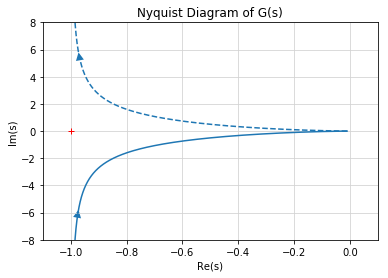

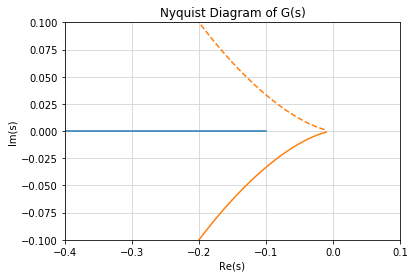

In [21]:
#Creating a transfer function G
s = control.TransferFunction.s

B = 1
# T = 10
G = 1 / (s**2+B*s)

control.nyquist(G)

plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-8,8)
plt.xlim(-1.1,.1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = np.linspace(-10,-0.1,5,endpoint=True)
y1 = 0*x1
ax.plot(x1,y1)
control.nyquist(G)
plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-.1,.1)
plt.xlim(-.4,.1)
plt.show()

According to the figure, the system does not have a limit cycle.

#### Problem 3 (Exercises 5.3): 
Determine whether the system in Figure5.30. Determine the largest $K$ which preserves the stability of the system. If $K=2K_{max}$, find the amplitude and frequency of the self-sustained oscillation.

**Solution:**    


$$ 
\begin{equation*}
N(A)=
\frac{2}{\pi} \left[ \sin^{-1}{\frac{20}{A}} + \frac{20}{A} \sqrt{1-\frac{400}{A^2}} \right]
\end{equation*}
$$

$$G(j\omega)=\frac{K}{-0.12\omega^2 + j(\omega-0.002\omega^3)}$$   
$$\omega-0.002\omega^3=0$$
$$\omega=10\sqrt{5}$$

According to figure5.12 in the textbook, $-1/N(A)=-1$ when $A \leq 20$, $-1/N(A)\leq -1$ when $A > 20$, thus
$$ Re(G(j\omega)) = \frac{K_{max}}{-0.12\omega^2}= -1$$

$$ K_{max} = 0.12 \omega^2 = 0.12 \times 500 = 60$$

When $K=2K_{max}=120$, 
$$G(j\sqrt{500})=\frac{120}{-0.12 \times 500} = -2 = -\frac{1}{N(A)}$$   
$$N(A)=0.5$$


In [4]:
x = symbols('x')
expr=2/pi*( asin(20/x)+ 20/x*sqrt(1-400/x**2) )-0.5
solve(expr)

NotImplementedError: multiple generators [x, asin(20/x), sqrt(1 - 400/x**2)]
No algorithms are implemented to solve equation 2*(asin(20/x) + 20*sqrt(1 - 400/x**2)/x)/pi - 1/2

In [68]:
x=0.634
y=20/3.14159*( 3.14159/2 - asin(0.1/x) - 0.1/x*sqrt(1-0.01/x**2) )-8
print(y)

9.24470806324962e-5


Thus, the frequency of the limit cycle is $\omega=10\sqrt{5}$ and the amplitude is $A=50$.

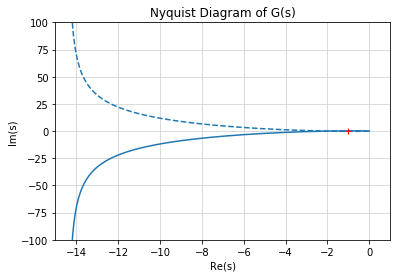

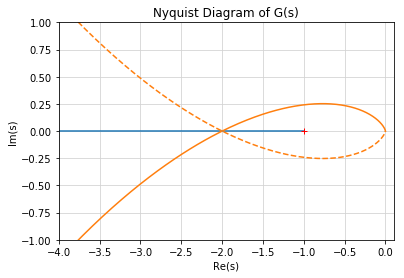

In [8]:
#Creating a transfer function G
s = control.TransferFunction.s

K0 = 120
# T = 10
G = K0 / (0.002*s**3+0.12*(s**2)+s)

control.nyquist(G)

plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-100,100)
plt.xlim(-15,1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = np.linspace(-10,-1,5,endpoint=True)
y1 = 0*x1
ax.plot(x1,y1)
control.nyquist(G)
plt.grid(True)
plt.title('Nyquist Diagram of G(s)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.ylim(-1,1)
plt.xlim(-4,.1)
plt.show()